## Visualização de dados
### Dataset Titanic

Estudando sobre visualização de dados, analisando o dataset do Titanic e extraindo insights através dos gráficos gerados buscando entender a relação entre os sobreviventes pela idade, classe e sexo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Carregando os dados
df = pd.read_csv('./dados/train.csv')

Renomeando as colunas para ter uma melhor visualização dos dados

In [2]:
# Renomeando colunas
df.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [3]:
# Renomeando os dados de sexo
df['Sexo'].replace({'male':'homem', 'female':'mulher'}, inplace=True)

In [4]:
# Visualizando
df.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Cabine'] = df['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

### Matplotlib

In [6]:
# Trocando os valores NaN pela média
df['Idade'].isnull().sum()

177

Pela distribuição das idades temos que uma média de idade 29 anos, sendo assim a maioria dos passageiros estão entre 25 a 35 anos.

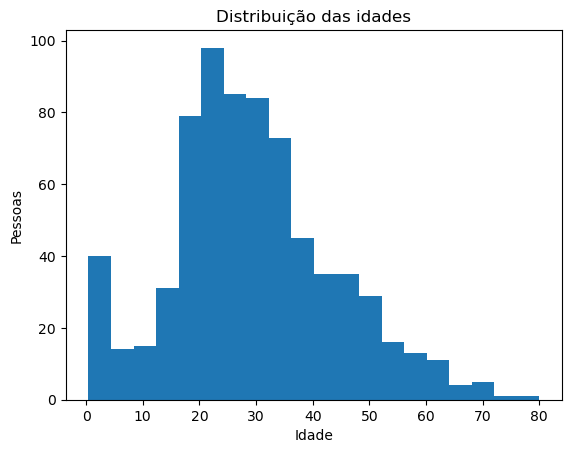

In [7]:
# Analisando as idade a partir de um gráfico
plt.hist(df['Idade'].dropna(), bins=20)
plt.title('Distribuição das idades')
plt.xlabel('Idade')
plt.ylabel('Pessoas')
plt.show()

In [8]:
# Temos os valores das classes e podemos analisar o volume de pessoas por classe
df['Classe'].unique()  # Retorna por volume dos dados

array([3, 1, 2], dtype=int64)

Vemos que a distribuição de pessoas por classe, temos uma diferença muito grande na classe C, agora precisamos analisar para ver o quanto a classe afeta para a sobrevivência dos passageiros.

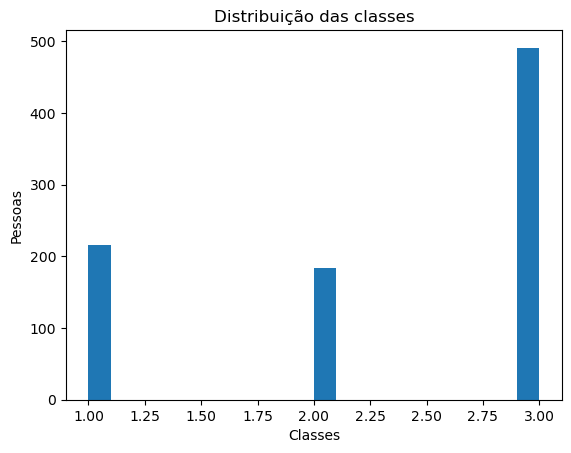

In [9]:
plt.hist(df['Classe'].dropna(), bins=20)
plt.title('Distribuição das classes')
plt.xlabel('Classes')
plt.ylabel('Pessoas')
plt.show()

### Subplot 1ª forma

Estudando as formas do subplot com o matplotlib

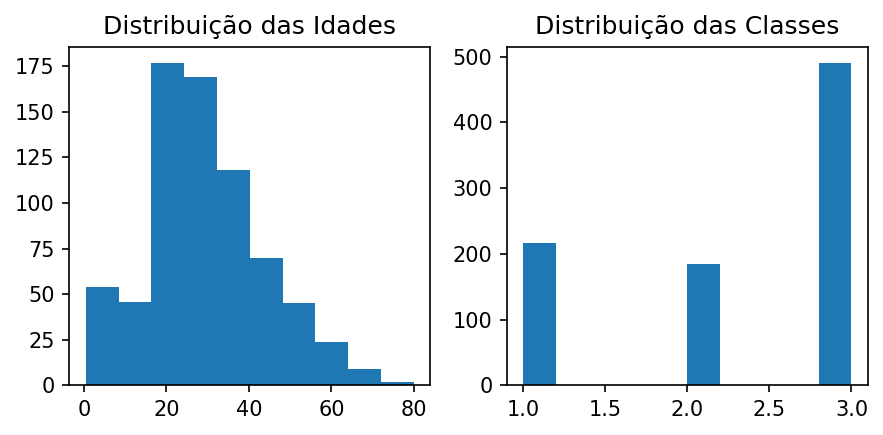

In [10]:
# Criando um Subplot com os dois gráficos
plt.figure(figsize=(6,3), dpi=150)
plt.subplot(1,2,1) # 1 Linha, 2 coluna, plot 1
plt.hist(df['Idade'].dropna())
plt.title('Distribuição das Idades')

plt.subplot(1,2,2) # 1 Linha, 2 coluna, plot 1
plt.hist(df['Classe'])
plt.title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Subplot 2ª forma

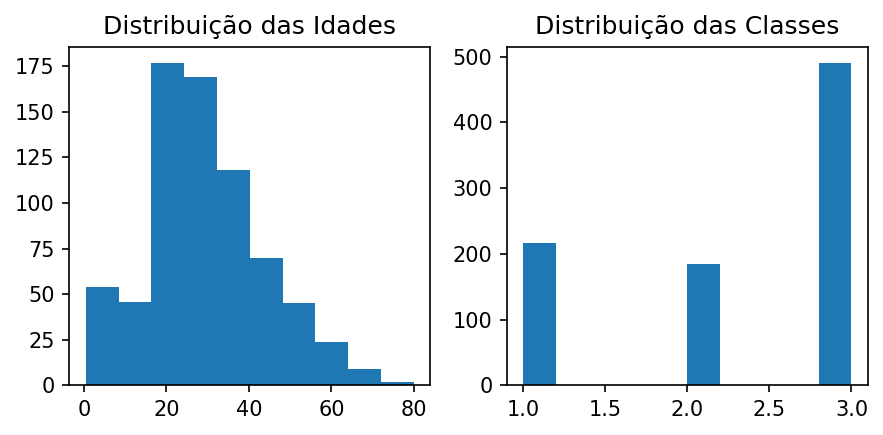

In [11]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150)  # 1 linha, 2 colunas

ax[0].hist(df['Idade'].dropna())
ax[0].set_title('Distribuição das Idades')

ax[1].hist(df['Classe'])
ax[1].set_title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Seaborn

Usando o seaborn para visualizar os gráfico

In [12]:
# Excelênte para diminuir os codigo tendo otimização
import seaborn as sns

In [13]:
# Utilizando em sobreviveu
df['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

Podemos ver nos gráficos que o número de sobreviventes foi muito menor porem o número de mulheres era menor que o número de homens, em outra análise vemos que o número de mulheres que sobreviveu foi maior que o número de homens, mesmo sendo menor o número de mulheres a sobrevivência delas chegou a 2x vezes mais que os homens.

Text(0.5, 1.0, 'Distribuição do sexo')

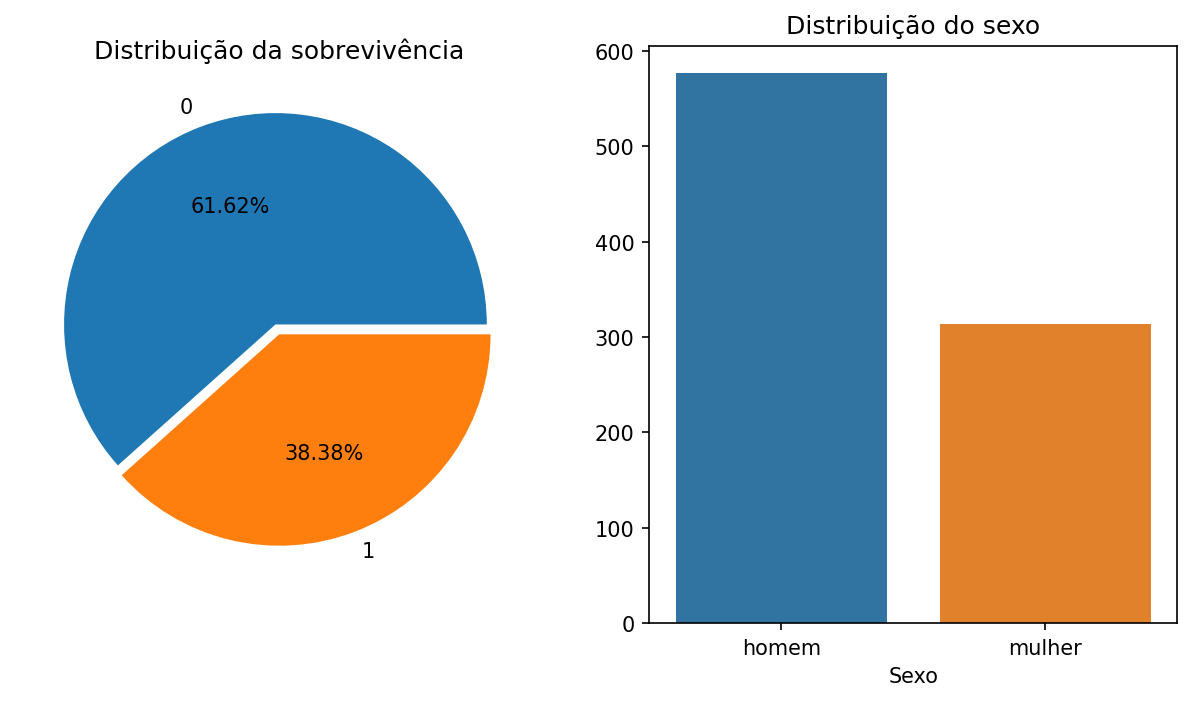

In [14]:
# Pie com o Matplotlib
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=150)
df['Sobreviveu'].value_counts().plot.pie(ax=ax[0], explode=[0.05,0.0], autopct='%0.2f%%')
ax[0].set_ylabel('')
ax[0].set_title('Distribuição da sobrevivência')

# Usando o Seaborn para o countplot
sns.countplot(x=df['Sexo'], ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('Distribuição do sexo')

### Countplot e Hue

<Axes: xlabel='Sobreviveu', ylabel='count'>

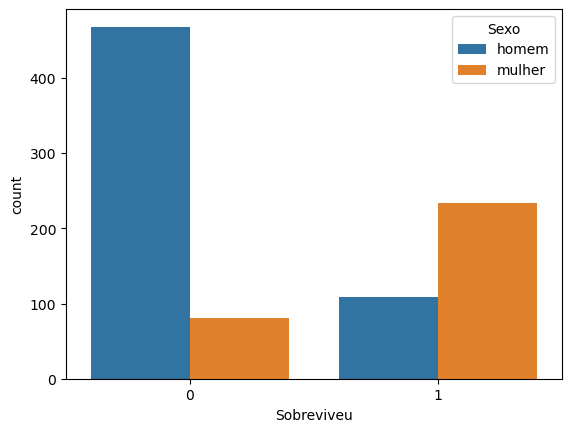

In [15]:
# Sobrevivência por sexo
sns.countplot(x=df['Sobreviveu'], hue='Sexo', data=df)

<Axes: xlabel='Classe', ylabel='Idade'>

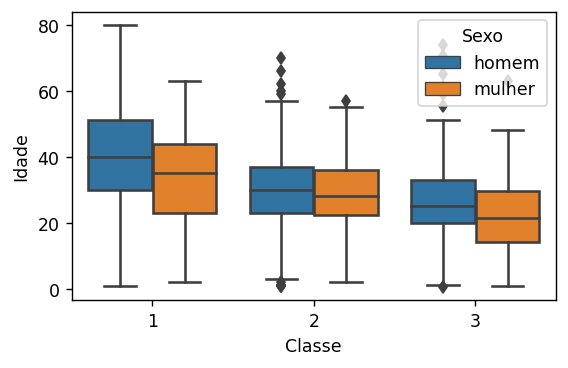

In [16]:
# Boxplot
plt.figure(figsize=(5,3), dpi=125)
sns.boxplot(x=df['Classe'], y=df['Idade'], hue='Sexo', data=df)

### FacetGrid com barplot

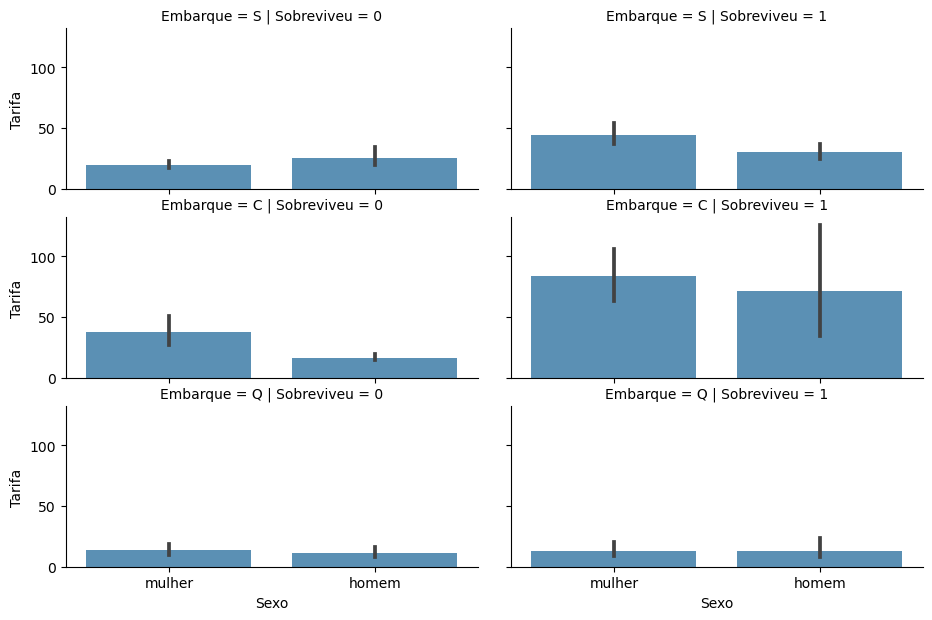

In [17]:
g = sns.FacetGrid(df, row='Embarque', col='Sobreviveu')
g.map_dataframe(sns.barplot, 'Sexo', 'Tarifa', alpha=0.8)

fig=plt.gcf()
fig.set_size_inches(10,6)

### FacetGrid com distplot

Aqui analisamos a sobrevivência por classe e idade, temos maior número de sobreviventes na primeira classe com idade entre 20 a 55 anos

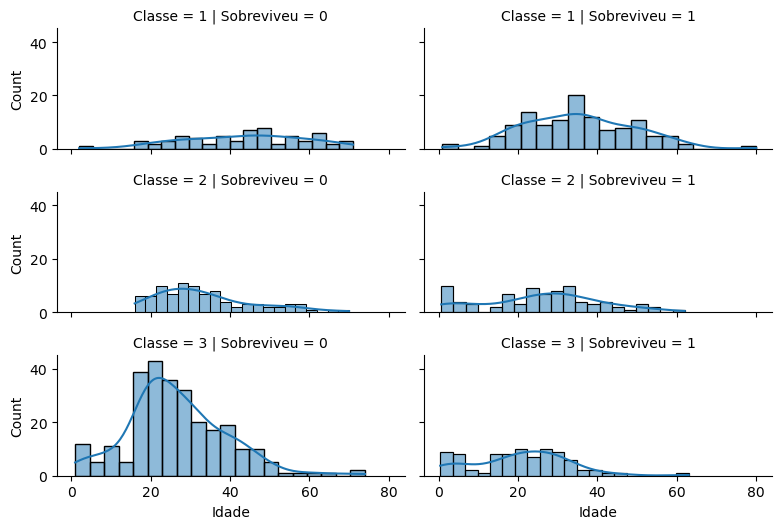

In [50]:
g = sns.FacetGrid(df, col='Sobreviveu', row='Classe', height=1.8, aspect=2.2)
g.map_dataframe(sns.histplot, 'Idade', bins=20, kde=True)

### Estudando Catplot usando point

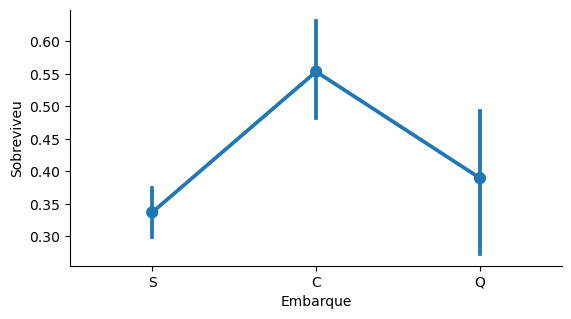

In [55]:
sns.catplot(data=df, x='Embarque', y='Sobreviveu', kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)

### FacetGrid com Pointplot

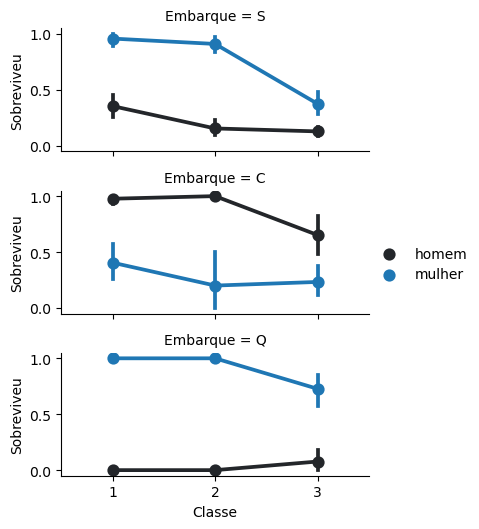

In [56]:
g = sns.FacetGrid(df, row='Embarque', height=1.8, aspect=2.2)
g.map_dataframe(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

### Heatmap - Mapa de calor

Vemos que há uma ausência de dados em 3 colunas sendo a cabine com muitos dados nulos, verificamos isso em um gráfico heatmap.

In [60]:
df.isnull().sum()

IdPassageiro       0
Sobreviveu         0
Classe             0
Nome               0
Sexo               0
Idade            177
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Cabine           687
Embarque           2
dtype: int64

<Axes: >

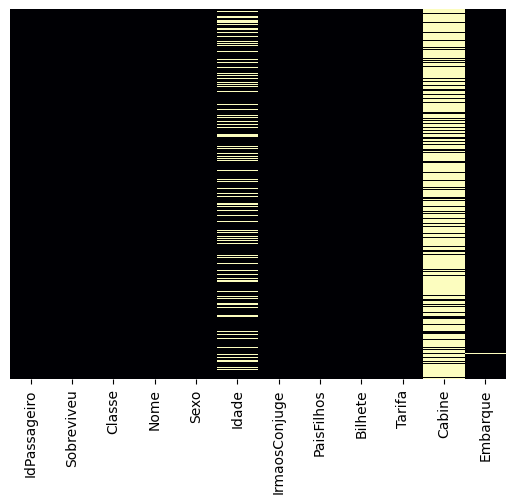

In [57]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='magma')

### Relplot e Scatterplot

Analisando os dados buscando o valor pago por tarifa usando a idade e sexo, vemos que a grande massa esta entre 0 a 70 dolares de 0 a 80 anos, temos valores até 300 dolares e valores acima de 500, sendo valores outliers. 

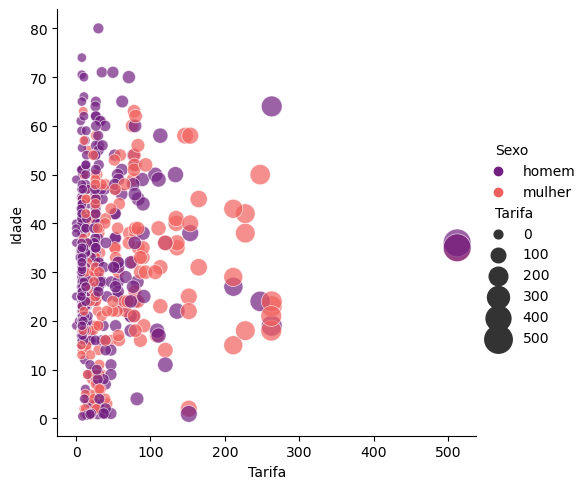

In [64]:
sns.relplot(data=df, x='Tarifa', y='Idade', hue='Sexo', size='Tarifa', sizes=(40,400),
           alpha=0.7, palette='magma')
plt.show()

Usando o scatterplot vemos da mesma forma a trajetória dos dados porem estamos usando o embarque como base para as bolhas.

<Axes: xlabel='Idade', ylabel='Tarifa'>

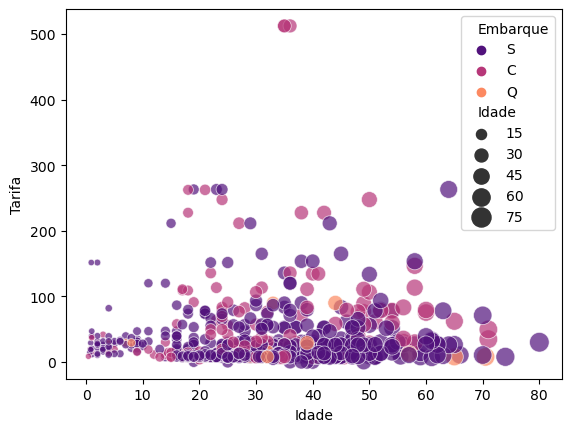

In [66]:
sns.scatterplot(data=df, x='Idade', y='Tarifa', hue='Embarque', size='Idade', sizes=(20,200),
           alpha=0.7, palette='magma')

### Pairplot

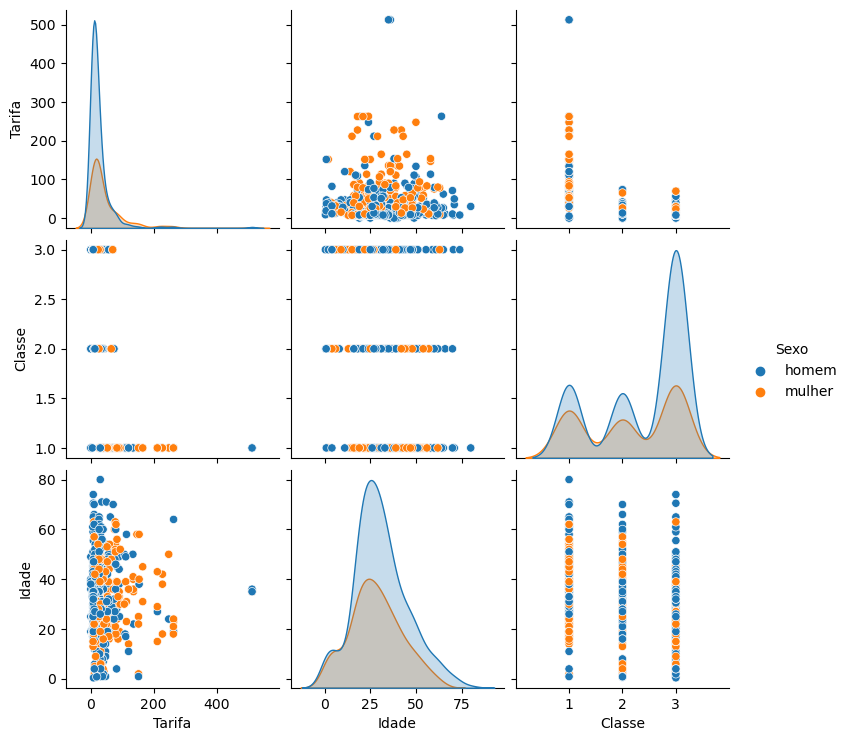

In [74]:
sns.pairplot(
    df, 
    x_vars=['Tarifa', 'Idade', 'Classe'],
    y_vars=['Tarifa', 'Classe', 'Idade'],
    hue='Sexo')

### kdeplot

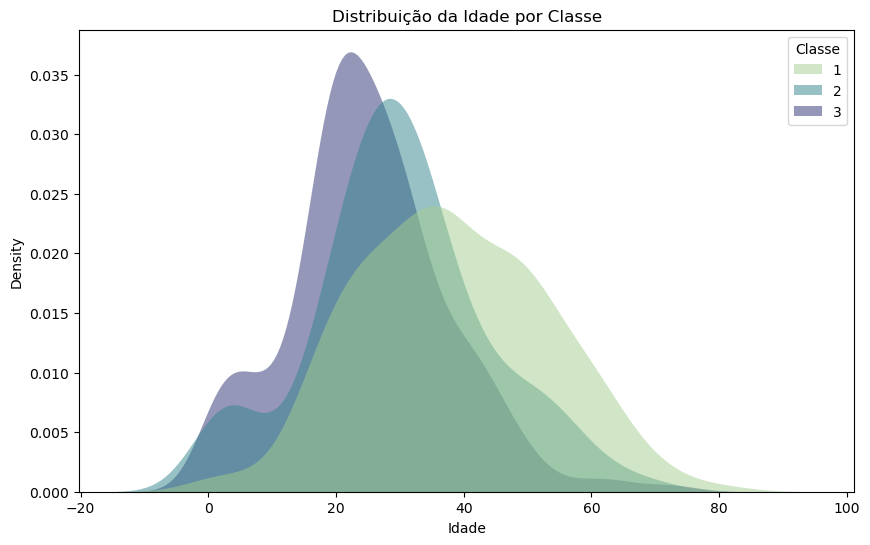

In [107]:
plt.figure(figsize=(10,6), dpi=100)
sns.kdeplot(
   data=df, x="Idade", hue="Classe",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Distribuição da Idade por Classe')

plt.show()

### Heatmap de Correlação

<Axes: >

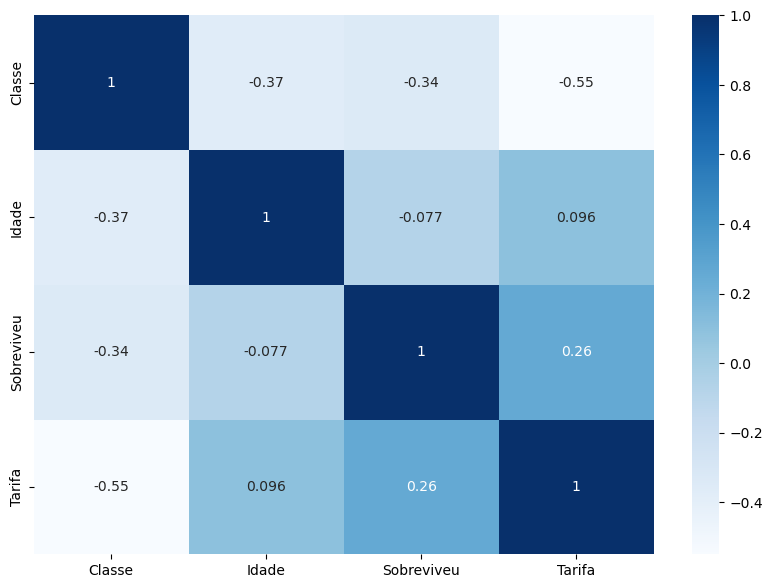

In [110]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['Classe', 'Idade', 'Sobreviveu', 'Tarifa']].corr(), 
           cmap='Blues', annot=True)